In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
from sklearn.impute import SimpleImputer
from scipy import stats

import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv("DataScience_salaries_2024.csv")

In [3]:
df0 = df.copy()

In [4]:
df=df0

In [5]:
df.sample(10)

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
9680,2023,SE,FT,Data Engineer,120000,USD,120000,US,100,US,M
9338,2023,SE,FT,Data Engineer,124740,USD,124740,US,0,US,M
1763,2024,SE,FT,Machine Learning Engineer,229000,USD,229000,US,0,US,M
342,2023,SE,FT,Data Scientist,310270,USD,310270,US,0,US,M
8842,2023,MI,FT,Data Engineer,130000,USD,130000,US,0,US,M
6030,2023,SE,FT,Machine Learning Engineer,158000,USD,158000,US,100,US,M
14446,2022,MI,FT,Data Engineer,45000,EUR,47280,ES,100,ES,M
4493,2023,MI,FT,Data Analyst,177000,USD,177000,US,0,US,M
1935,2023,MI,FT,Machine Learning Researcher,224400,USD,224400,US,0,US,M
14267,2022,EN,FL,Data Analytics Consultant,50000,USD,50000,BE,100,US,S


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14838 entries, 0 to 14837
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           14838 non-null  int64 
 1   experience_level    14838 non-null  object
 2   employment_type     14838 non-null  object
 3   job_title           14838 non-null  object
 4   salary              14838 non-null  int64 
 5   salary_currency     14838 non-null  object
 6   salary_in_usd       14838 non-null  int64 
 7   employee_residence  14838 non-null  object
 8   remote_ratio        14838 non-null  int64 
 9   company_location    14838 non-null  object
 10  company_size        14838 non-null  object
dtypes: int64(4), object(7)
memory usage: 1.2+ MB


In [7]:
df.isnull().sum()

work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

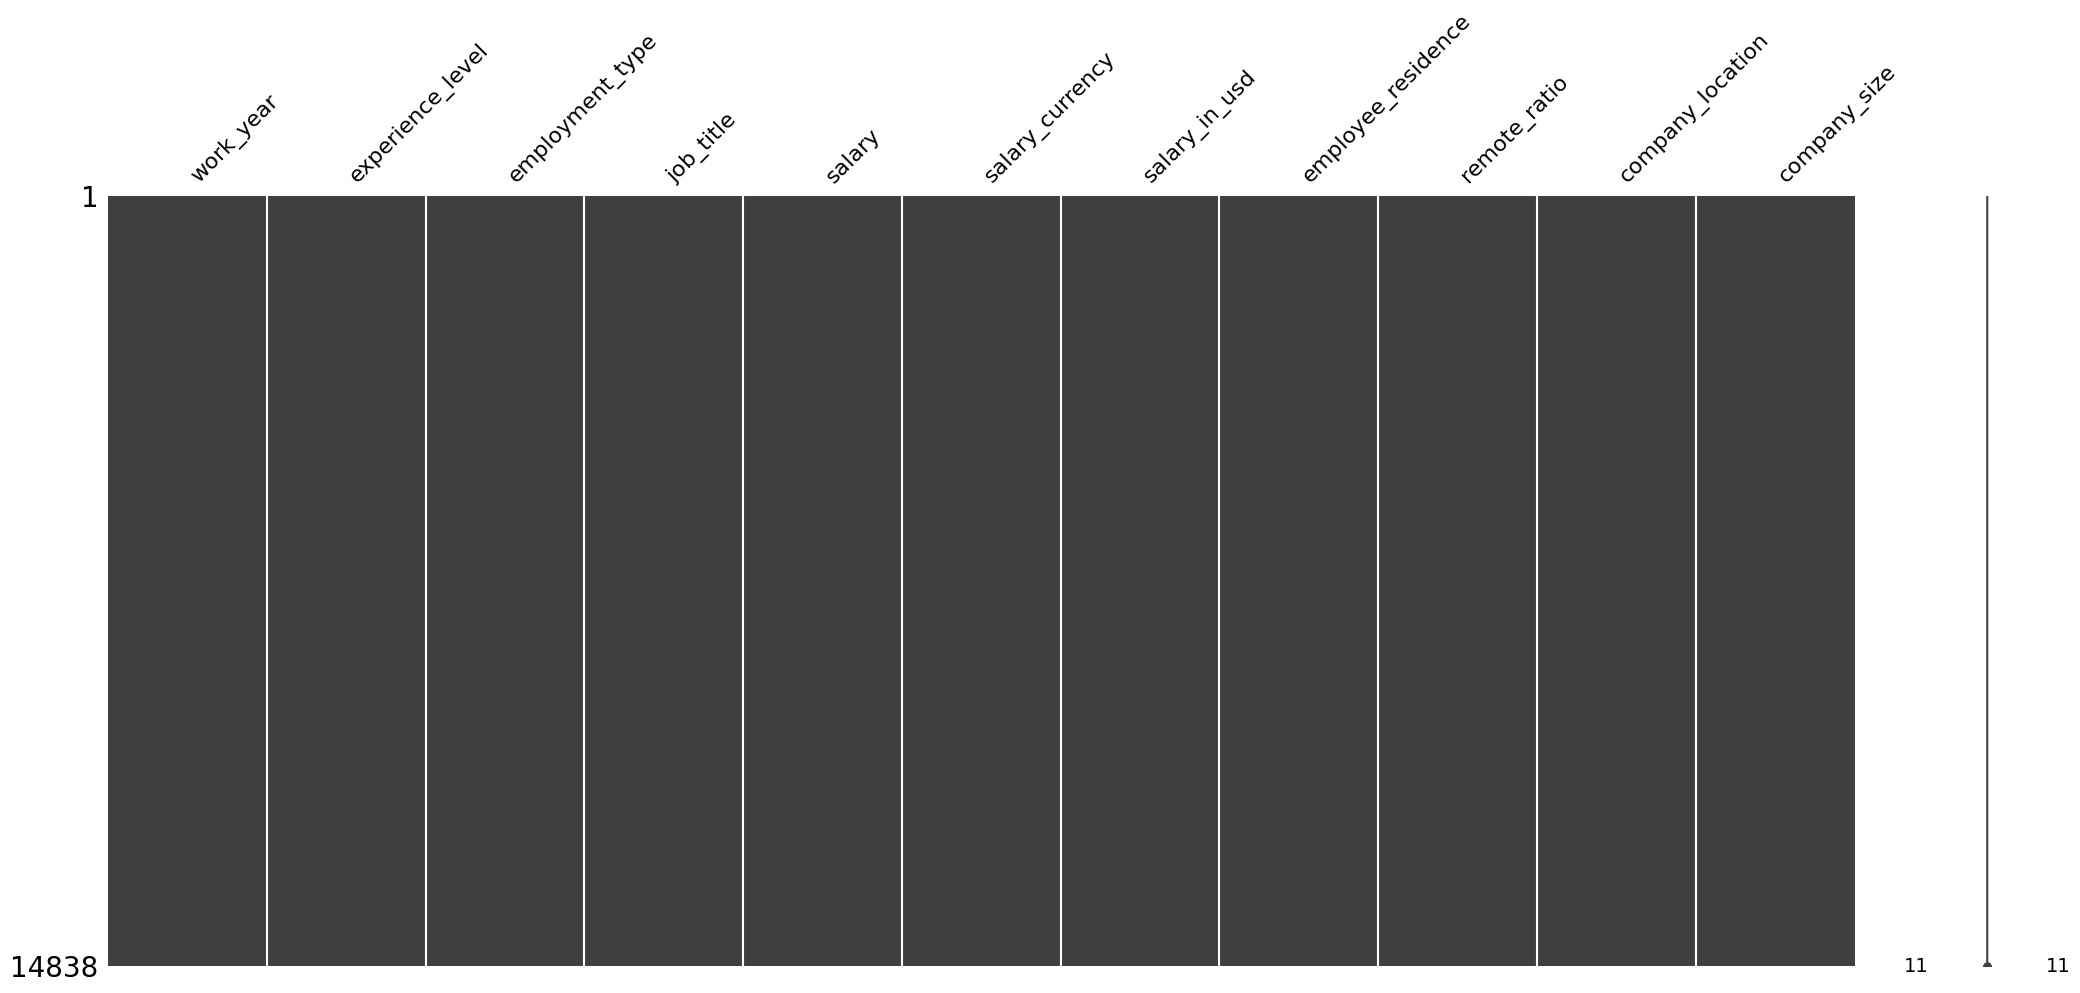

In [8]:
msno.matrix(df);

In [9]:
df.duplicated().sum()

5711

In [10]:
df['job_title'].value_counts().head(25)

job_title
Data Engineer                      3162
Data Scientist                     3015
Data Analyst                       2189
Machine Learning Engineer          1542
Research Scientist                  475
Analytics Engineer                  403
Applied Scientist                   383
Data Architect                      369
Research Engineer                   276
Business Intelligence Engineer      230
Data Science                        205
Data Manager                        188
ML Engineer                         163
Business Intelligence Analyst       147
Machine Learning Scientist          124
Data Science Manager                114
Research Analyst                    107
AI Engineer                         105
BI Developer                         84
Data Science Consultant              79
Data Specialist                      78
Data Analytics Manager               56
Business Intelligence                50
Business Intelligence Developer      49
Head of Data                  

In [11]:
# Kac tane duplicate olduğunu göstermek için
duplicate_counts = df.duplicated().sum()
unique_counts = len(df) - duplicate_counts

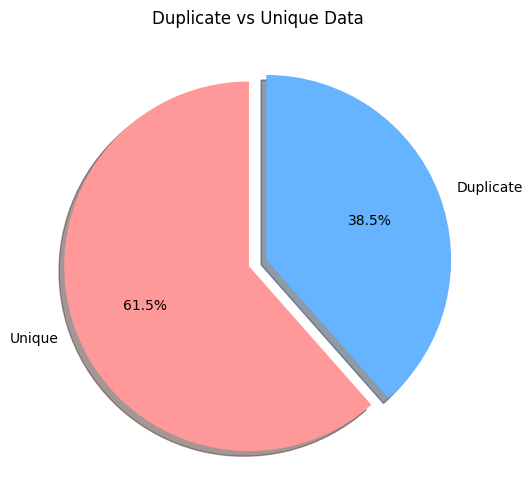

In [12]:
# Pie chart ile duplicate ve unique verileri gösterelim
import matplotlib.pyplot as plt

labels = ['Unique', 'Duplicate']
sizes = [unique_counts, duplicate_counts]
colors = ['#ff9999','#66b3ff']
explode = (0.05, 0.05)

plt.figure(figsize=(6,6))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=90)
plt.title('Duplicate vs Unique Data')
plt.show()

In [13]:
print(f"Orijinal veri seti boyutu: {df.shape}")

Orijinal veri seti boyutu: (14838, 11)


In [14]:
# Duplicate verileri kaldırma (ilk görüleni koruyarak)
df = df.drop_duplicates()
print(f"Temizlenmiş veri seti boyutu: {df.shape}")

Temizlenmiş veri seti boyutu: (9127, 11)


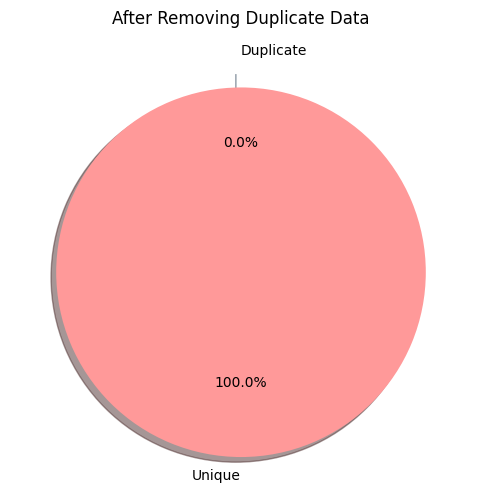

In [15]:
# Duplicate veriler temizlendikten sonra aynı grafik
duplicate_counts = df.duplicated().sum()
unique_counts = len(df) - duplicate_counts

sizes_cleaned = [unique_counts, duplicate_counts]

plt.figure(figsize=(6,6))
plt.pie(sizes_cleaned, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=90)
plt.title('After Removing Duplicate Data')
plt.show()

In [16]:
# Sayısal sütunlarda negatif değer olup olmadığını kontrol edelim
numeric_columns = df.select_dtypes(include=['int64', 'float64']).columns
negative_values = df[numeric_columns] < 0
negative_counts = negative_values.sum()

print("Sayısal sütunlarda negatif değerlerin sayısı:\n", negative_counts)

Sayısal sütunlarda negatif değerlerin sayısı:
 work_year        0
salary           0
salary_in_usd    0
remote_ratio     0
dtype: int64


In [17]:
df.describe()

,work_year,salary,salary_in_usd,remote_ratio
count,9127.000000,9.127000e+03,9127.000000,9127.000000
mean,2023.144735,1.715814e+05,146752.407363,36.309850
std,0.779968,4.514935e+05,73414.901761,47.386109
min,2020.000000,1.400000e+04,15000.000000,0.000000
25%,2023.000000,9.545150e+04,95000.000000,0.000000
50%,2023.000000,1.400000e+05,138400.000000,0.000000
75%,2024.000000,1.885000e+05,185900.000000,100.000000
max,2024.000000,3.040000e+07,800000.000000,100.000000


In [18]:
# Bilimsel gösterimi kapat
pd.set_option('display.float_format', '{:.2f}'.format)

In [19]:
df.describe()

,work_year,salary,salary_in_usd,remote_ratio
count,9127.00,9127.00,9127.00,9127.00
mean,2023.14,171581.43,146752.41,36.31
std,0.78,451493.53,73414.90,47.39
min,2020.00,14000.00,15000.00,0.00
25%,2023.00,95451.50,95000.00,0.00
50%,2023.00,140000.00,138400.00,0.00
75%,2024.00,188500.00,185900.00,100.00
max,2024.00,30400000.00,800000.00,100.00


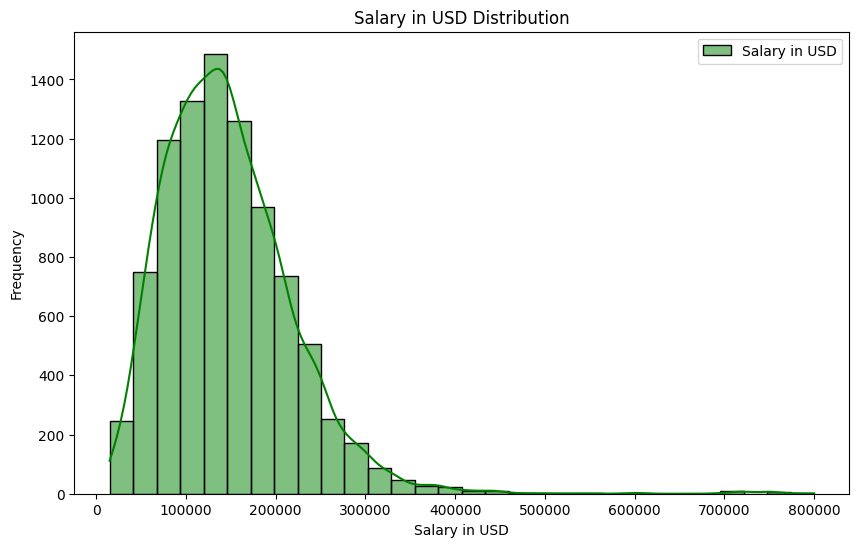

In [20]:
# Salary in USD dağılımı
plt.figure(figsize=(10, 6))
sns.histplot(df['salary_in_usd'], kde=True, bins=30, color='green', label='Salary in USD')
plt.title('Salary in USD Distribution')
plt.xlabel('Salary in USD')
plt.ylabel('Frequency')
plt.legend()
plt.show()

 Sağa çarpık dağılımlar, çok sayıda kişinin daha düşük maaş aldığı, ancak az sayıda kişinin aşırı yüksek maaş aldığı durumlarda ortaya çıkar.

In [21]:
# salary_in_usd sütunu için mod, medyan ve ortalama değerlerini alalım
salary_mode = df['salary_in_usd'].mode()[0]
salary_median = df['salary_in_usd'].median()
salary_mean = df['salary_in_usd'].mean()

print(f"Mod: {salary_mode}, Medyan: {salary_median}, Ortalama: {salary_mean}")

Mod: 150000, Medyan: 138400.0, Ortalama: 146752.4073627698


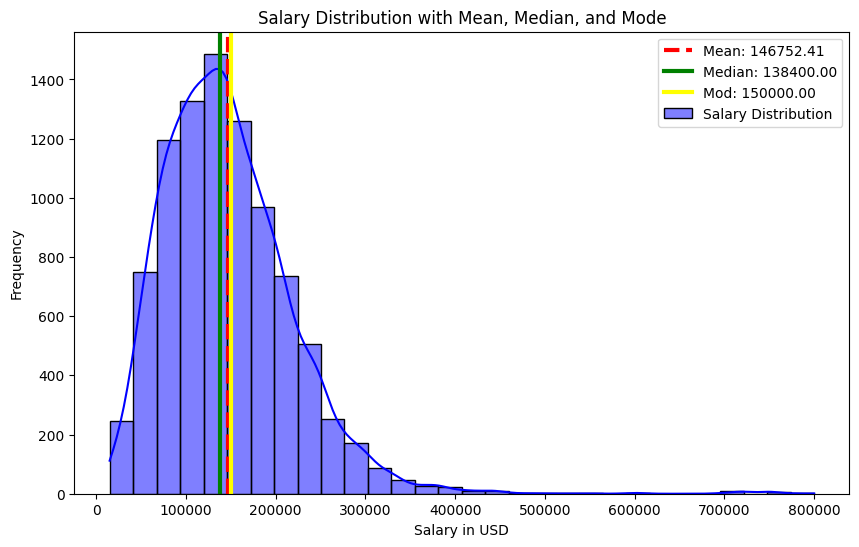

In [22]:
# Salary dağılımını ve istatistiksel değerleri gösterecek grafik
plt.figure(figsize=(10, 6))
sns.histplot(df['salary_in_usd'], kde=True, bins=30, color='blue', label='Salary Distribution')

# Ortalama, Medyan ve Modu gösterelim
plt.axvline(salary_mean, color='red', linestyle='--',lw=3, label=f'Mean: {salary_mean:.2f}')
plt.axvline(salary_median, color='green', linestyle='-',lw=3, label=f'Median: {salary_median:.2f}')
plt.axvline(salary_mode, color='yellow', linestyle='-', lw=3, label=f'Mod: {salary_mode:.2f}')

plt.title('Salary Distribution with Mean, Median, and Mode')
plt.xlabel('Salary in USD')
plt.ylabel('Frequency')
plt.legend()
plt.show()

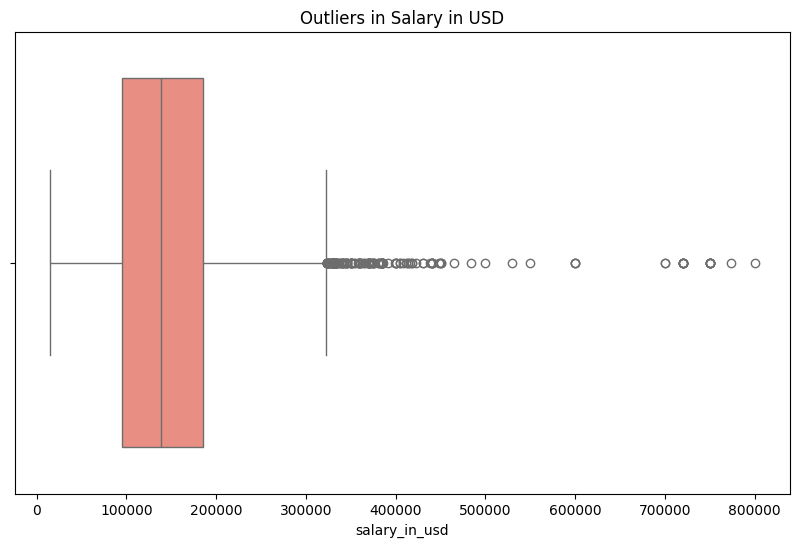

In [23]:
# Salary_in_usd sütununda aykırı değerleri tespit etmek için boxplot kullanıyoruz
plt.figure(figsize=(10,6))
sns.boxplot(data=df, x='salary_in_usd', color='#FA8072')
plt.title('Outliers in Salary in USD')
plt.show()

In [24]:
# Salary_in_usd sütununda aykırı değerleri tespit etme
Q1 = df['salary_in_usd'].quantile(0.25)
Q3 = df['salary_in_usd'].quantile(0.75)
IQR = Q3 - Q1

In [25]:
# Aykırı değerleri belirleme
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
print(lower_bound)
print(upper_bound)

-41350.0
322250.0


In [26]:
# Aykırı değerleri görüntüleme
outliers = df[(df['salary_in_usd'] < lower_bound) | (df['salary_in_usd'] > upper_bound)]
print("Aykırı Değerler:")
outliers

Aykırı Değerler:


,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
46,2023,SE,FT,AI Scientist,1500000,ILS,417937,IL,0,IL,L
66,2024,MI,FT,AI Architect,800000,USD,800000,CA,100,CA,M
68,2024,EN,FT,Data Analyst,774000,USD,774000,MX,0,MX,M
69,2024,SE,FT,Analytics Engineer,750000,USD,750000,US,0,US,M
70,2024,MI,FT,Machine Learning Scientist,750000,USD,750000,US,0,US,M
...,...,...,...,...,...,...,...,...,...,...,...
442,2023,MI,FT,Analytics Engineer,300000,GBP,369120,GB,0,GB,M
448,2023,MI,FT,AI Engineer,300000,GBP,369120,GB,0,GB,M
449,2023,MI,FT,Data Analyst,300000,GBP,369120,GB,0,GB,M
460,2023,SE,CT,Finance Data Analyst,300000,EUR,323905,FR,100,US,M


In [27]:
# Maaş sütununda aykırı değerleri tespit et
print(f"Tespit edilen aykırı değer sayısı: {len(outliers)}")

Tespit edilen aykırı değer sayısı: 166


In [28]:
df = df[df['salary_in_usd'] < df['salary_in_usd'].quantile(0.99)]

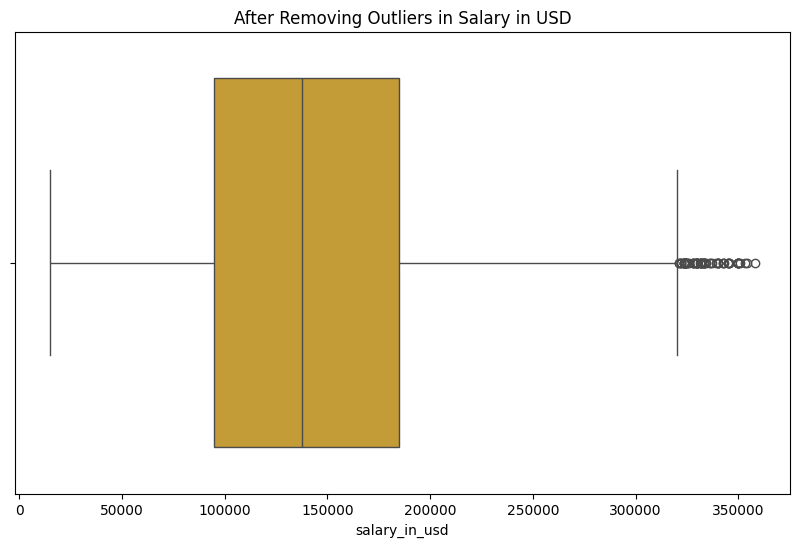

In [29]:
# Aykırı değerler temizlendikten sonra boxplot ile gösterelim
plt.figure(figsize=(10,6))
sns.boxplot(data=df, x='salary_in_usd', color = '#DAA520')
plt.title('After Removing Outliers in Salary in USD')
plt.show()

In [30]:
df['job_title'].value_counts().head(10)

job_title
Data Engineer                1703
Data Scientist               1676
Data Analyst                 1240
Machine Learning Engineer     858
Analytics Engineer            326
Research Scientist            275
Data Architect                239
Research Engineer             186
Data Science                  161
ML Engineer                   140
Name: count, dtype: int64

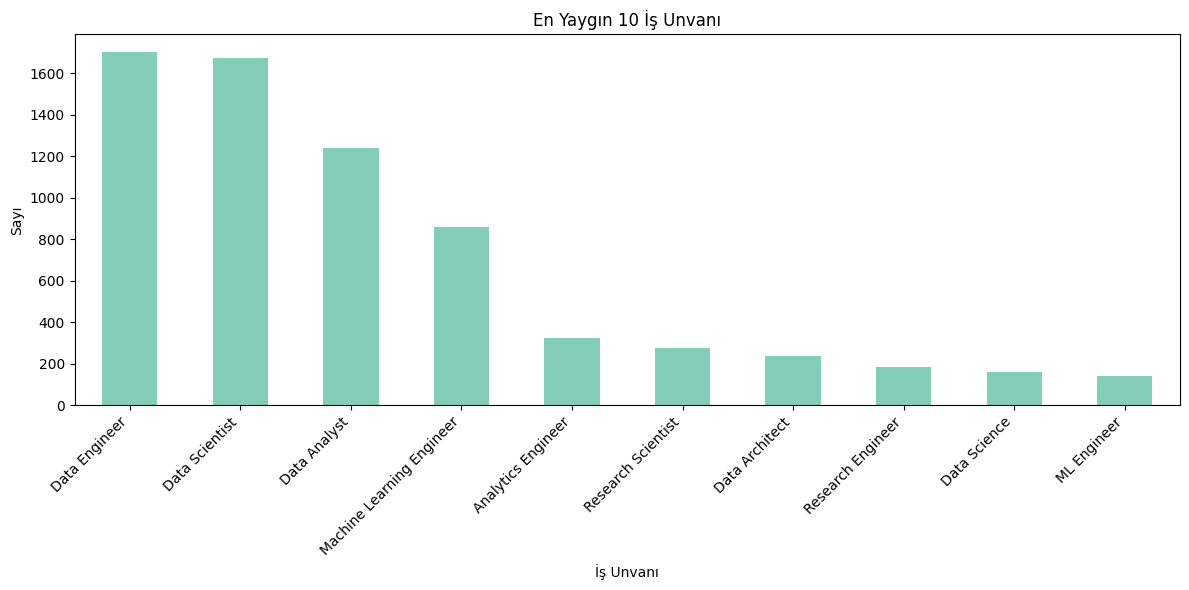

In [31]:
# 1: En yaygın iş unvanları & En Çok Talep Gören İş Unvanları
plt.figure(figsize=(12, 6))
df['job_title'].value_counts().head(10).plot(kind='bar', colormap='Set2', alpha=0.8)
plt.title('En Yaygın 10 İş Unvanı')
plt.xlabel('İş Unvanı')
plt.ylabel('Sayı')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

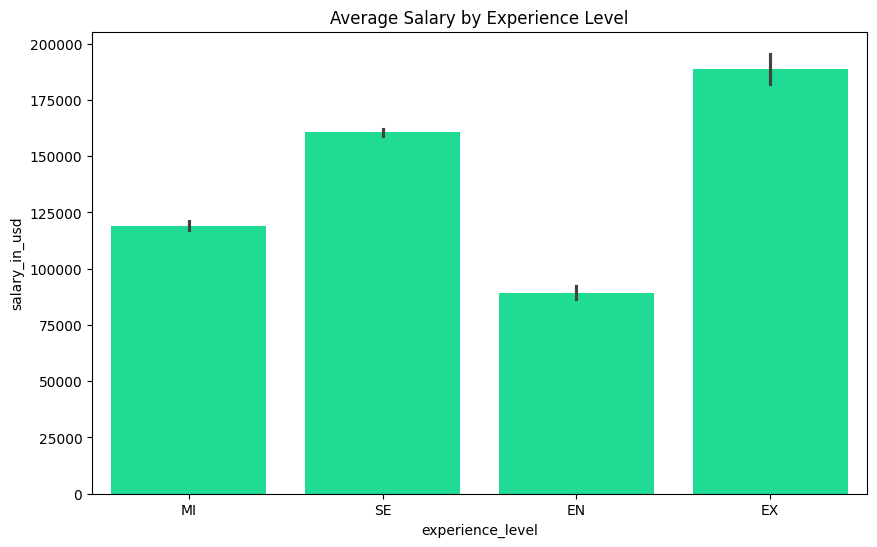

In [32]:
# 2. Deneyim Seviyesine Göre Maaş Analizi
plt.figure(figsize=(10, 6))
sns.barplot(x='experience_level', y='salary_in_usd', data=df, color = '#00FA9A')
plt.title('Average Salary by Experience Level')
plt.show()

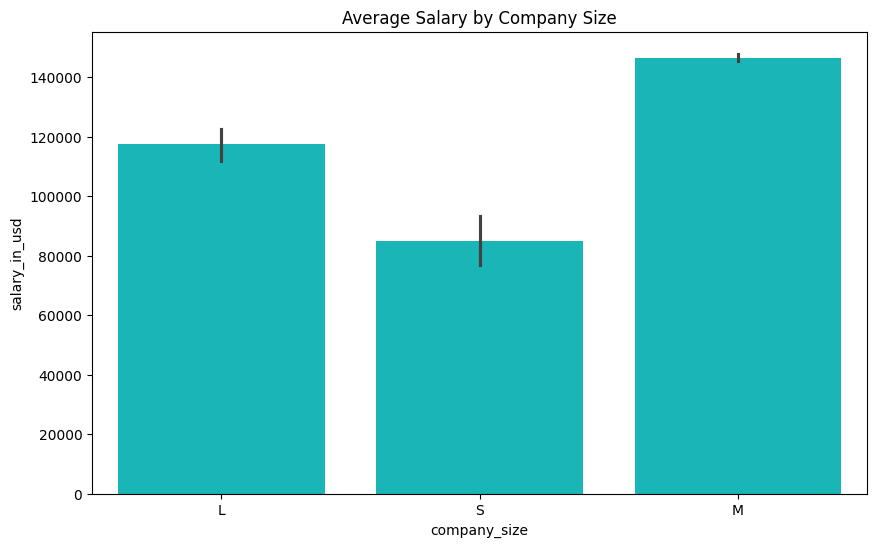

In [33]:
# 3. Şirket Büyüklüğüne Göre Maaş Analizi
plt.figure(figsize=(10, 6))
sns.barplot(x='company_size', y='salary_in_usd', data=df, color = '#00CED1')
plt.title('Average Salary by Company Size')
plt.show()

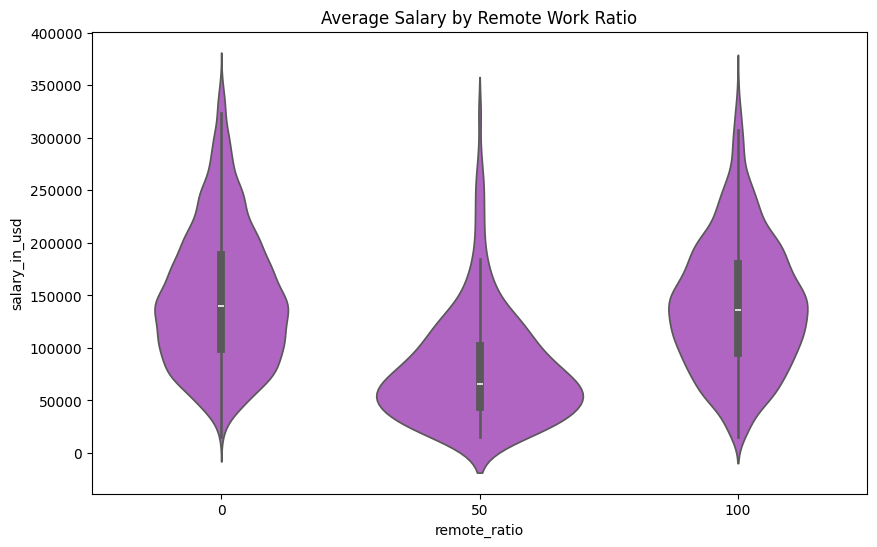

In [34]:
# 4. Uzaktan Çalışma Oranına Göre Maaş Analizi
plt.figure(figsize=(10, 6))
sns.violinplot(x='remote_ratio', y='salary_in_usd', data=df, color= '#BA55D3')
plt.title('Average Salary by Remote Work Ratio')
plt.show()

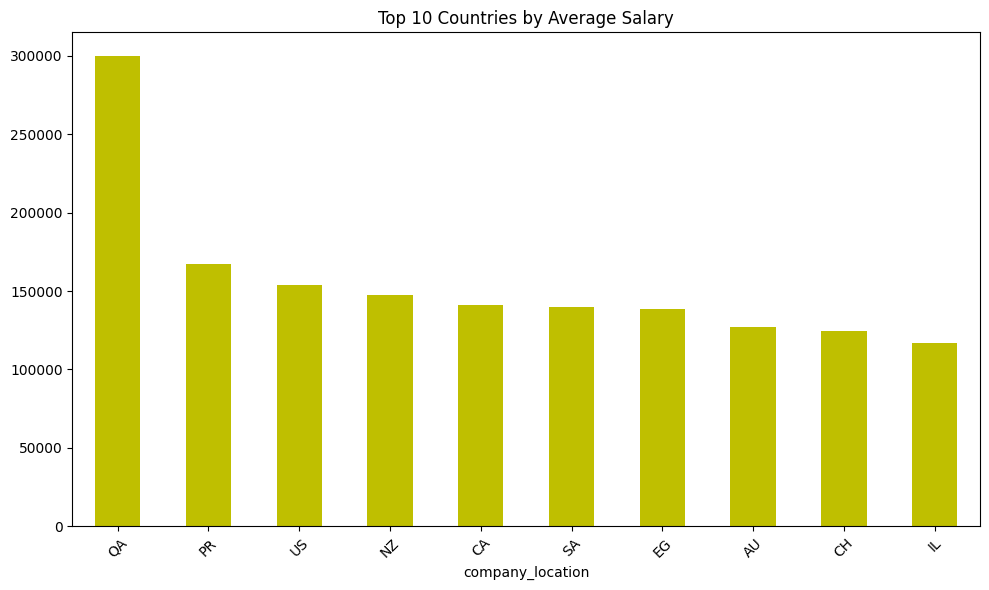

In [35]:
# 5. Ülkelere Göre Ortalama Maaş
top_10_countries = df.groupby('company_location')['salary_in_usd'].mean().nlargest(10)
plt.figure(figsize=(10, 6))
top_10_countries.plot(kind='bar', color='y')
plt.title('Top 10 Countries by Average Salary')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

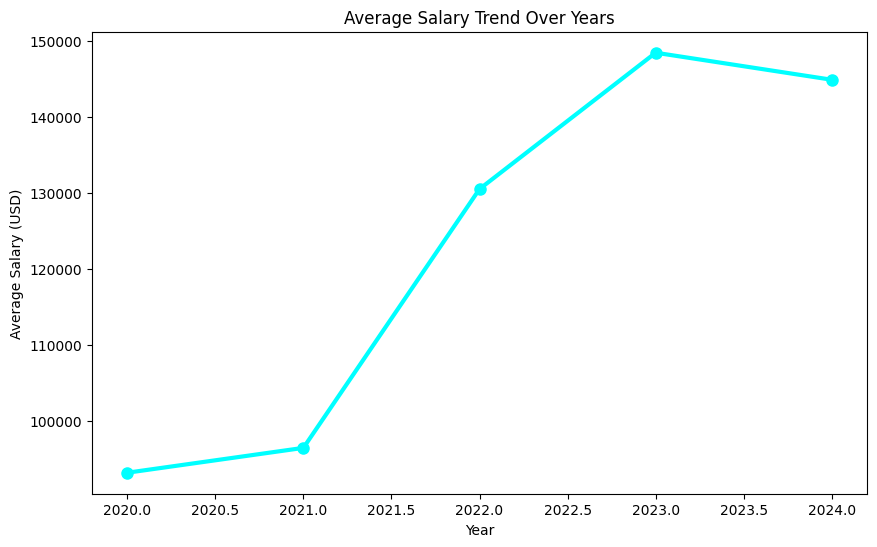

In [36]:
# 6. Yıllara Göre Maaş Trendi
yearly_salary = df.groupby('work_year')['salary_in_usd'].mean()
plt.figure(figsize=(10, 6))
yearly_salary.plot(kind='line', marker='o', lw=3, ms=8, color='#00FFFF')
plt.title('Average Salary Trend Over Years')
plt.xlabel('Year')
plt.ylabel('Average Salary (USD)')
plt.show()

In [37]:
# Çalışma şekillerini kategorik hale getirme
df['remote_category'] = df['remote_ratio'].map({0: 'On-site', 50: 'Hybrid', 100: 'Full Remote'})

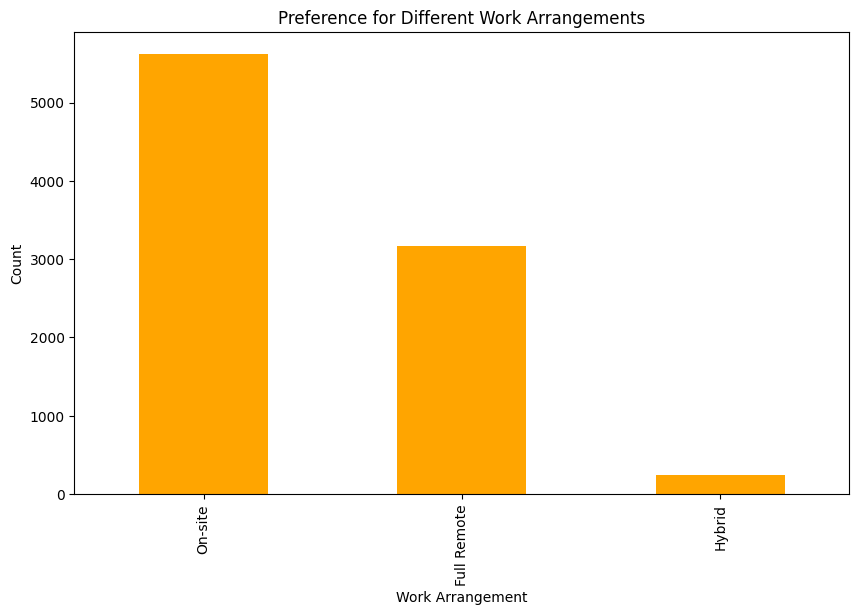

In [38]:
# 7.Çalışma şekilleri oranları
work_arrangement_counts = df['remote_category'].value_counts()
plt.figure(figsize=(10, 6))
work_arrangement_counts.plot(kind='bar', color='#FFA500')
plt.title('Preference for Different Work Arrangements')
plt.xlabel('Work Arrangement')
plt.ylabel('Count')
plt.show()

In [39]:
df['job_title'].value_counts().head(10)

job_title
Data Engineer                1703
Data Scientist               1676
Data Analyst                 1240
Machine Learning Engineer     858
Analytics Engineer            326
Research Scientist            275
Data Architect                239
Research Engineer             186
Data Science                  161
ML Engineer                   140
Name: count, dtype: int64

In [40]:
top_10_titles = df['job_title'].value_counts().head(10).index

# Veriyi filtreleme: Sadece ilk 10 iş unvanını seç
filtered_df = df[df['job_title'].isin(top_10_titles)]

# Çalışma şekillerine göre gruplama
grouped_df = filtered_df.groupby(['job_title', 'remote_category']).size().unstack(fill_value=0)

<Figure size 1200x800 with 0 Axes>

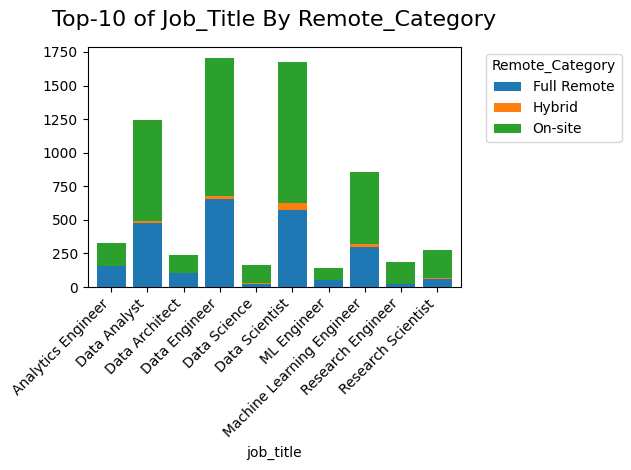

In [41]:
# 8.job_title göre çalışma şekilleri
plt.figure(figsize=(12, 8))
grouped_df.plot(kind='bar', stacked=True, width=0.8)
plt.title('Top-10 of Job_Title By Remote_Category', fontsize=16 , pad=15)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.legend(title='Remote_Category', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout();

<Figure size 1000x600 with 0 Axes>

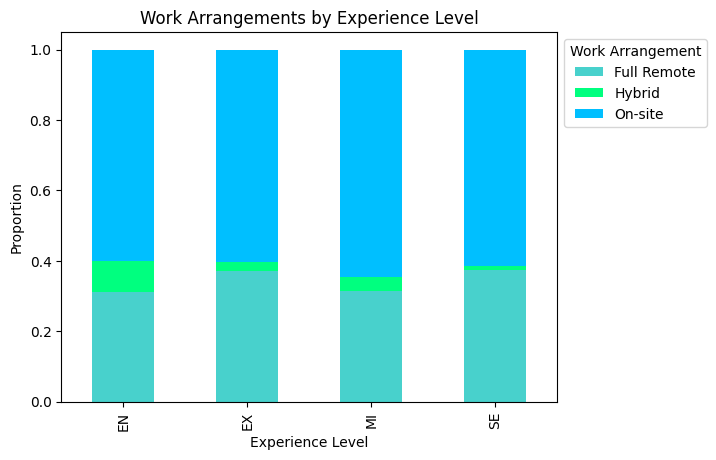

In [42]:
# 9.Deneyim seviyelerine göre çalışma şekilleri
experience_remote = pd.crosstab(df['experience_level'], df['remote_category'], normalize='index')
plt.figure(figsize=(10, 6))
experience_remote.plot(kind='bar', stacked=True, color = ['#48D1CC', '#00FF7F', '#00BFFF'])
plt.title('Work Arrangements by Experience Level')
plt.xlabel('Experience Level')
plt.ylabel('Proportion')
plt.legend(title='Work Arrangement', bbox_to_anchor=(1, 1))
plt.show()

<Figure size 1000x600 with 0 Axes>

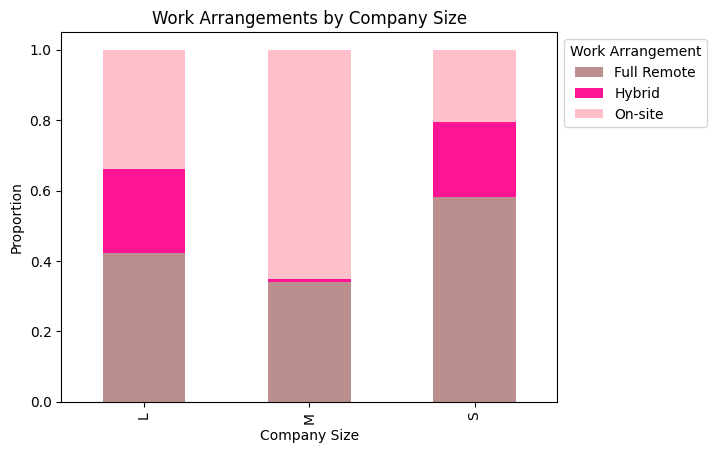

In [43]:
# 10.Şirket büyüklüğüne göre çalışma şekilleri
company_size_remote = pd.crosstab(df['company_size'], df['remote_category'], normalize='index')
plt.figure(figsize=(10, 6))
company_size_remote.plot(kind='bar', stacked=True, color = ['#BC8F8F', '#FF1493', '#FFC0CB'])
plt.title('Work Arrangements by Company Size')
plt.xlabel('Company Size')
plt.ylabel('Proportion')
plt.legend(title='Work Arrangement' , bbox_to_anchor=(1, 1))
plt.show()

<Figure size 1200x600 with 0 Axes>

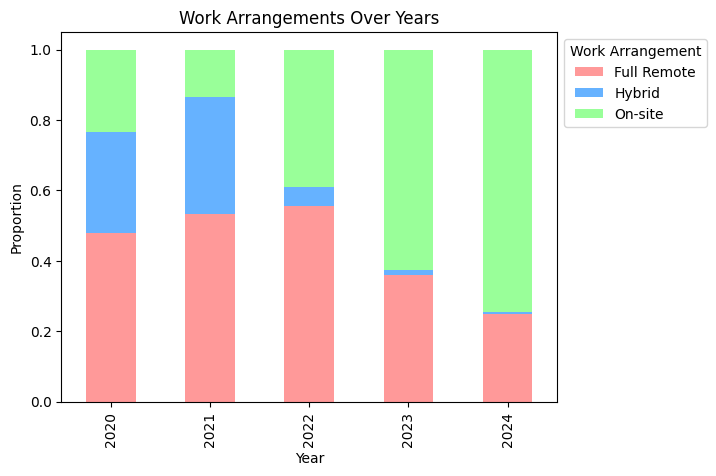

In [44]:
# 11. Yıllara göre çalışma şekillerinin değişimi
work_arrangement_by_year = pd.crosstab(df['work_year'], df['remote_category'], normalize='index')
plt.figure(figsize=(12, 6))
work_arrangement_by_year.plot(kind='bar', stacked=True, color = ['#FF9999', '#66B2FF', '#99FF99'])
plt.title('Work Arrangements Over Years')
plt.xlabel('Year')
plt.ylabel('Proportion')
plt.legend(title='Work Arrangement', bbox_to_anchor=(1, 1))
plt.show()

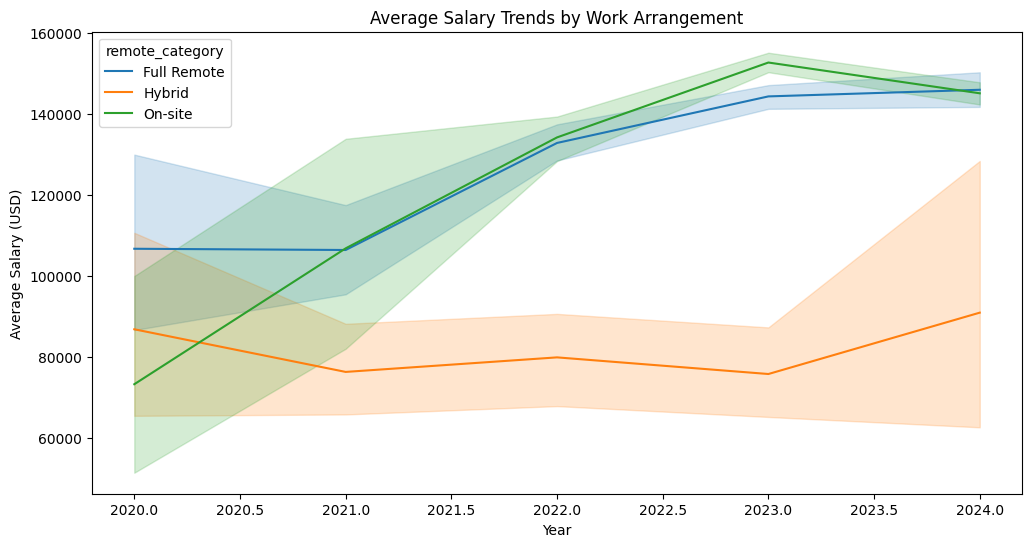

In [45]:
# 12. Yıllara göre ortalama maaşların değişimi (çalışma şekillerine göre)
plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x='work_year', y='salary_in_usd', hue='remote_category')
plt.title('Average Salary Trends by Work Arrangement')
plt.xlabel('Year')
plt.ylabel('Average Salary (USD)')
plt.show()

<Figure size 1200x600 with 0 Axes>

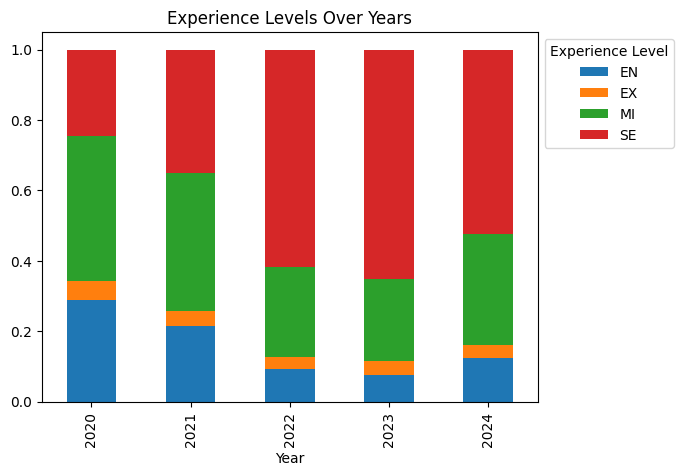

In [46]:
# 13. Yıllara göre deneyim seviyelerinin değişimi
experience_by_year = pd.crosstab(df['work_year'], df['experience_level'], normalize='index')
plt.figure(figsize=(12, 6))
experience_by_year.plot(kind='bar', stacked=True)
plt.title('Experience Levels Over Years')
plt.xlabel('Year')
plt.legend(title='Experience Level',bbox_to_anchor = (1,1))
plt.show()

<Figure size 1200x600 with 0 Axes>

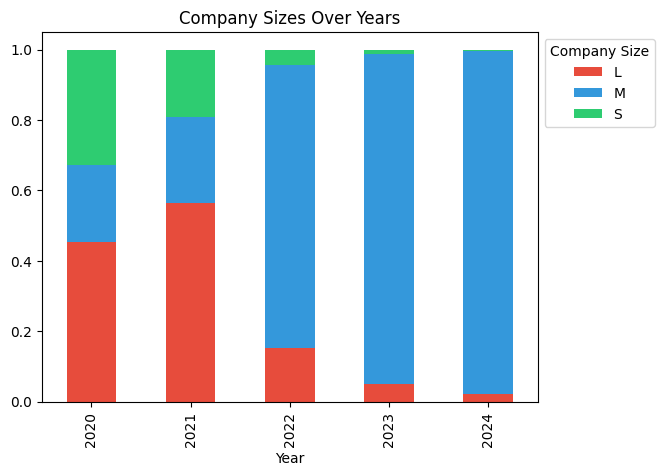

In [47]:
# 14. Yıllara göre şirket büyüklüklerinin değişimi
company_size_by_year = pd.crosstab(df['work_year'], df['company_size'], normalize='index')
plt.figure(figsize=(12, 6))
company_size_by_year.plot(kind='bar', stacked=True, color=['#E74C3C', '#3498DB', '#2ECC71'])
plt.title('Company Sizes Over Years')
plt.xlabel('Year')
plt.legend(title='Company Size', bbox_to_anchor=(1,1))
plt.show()

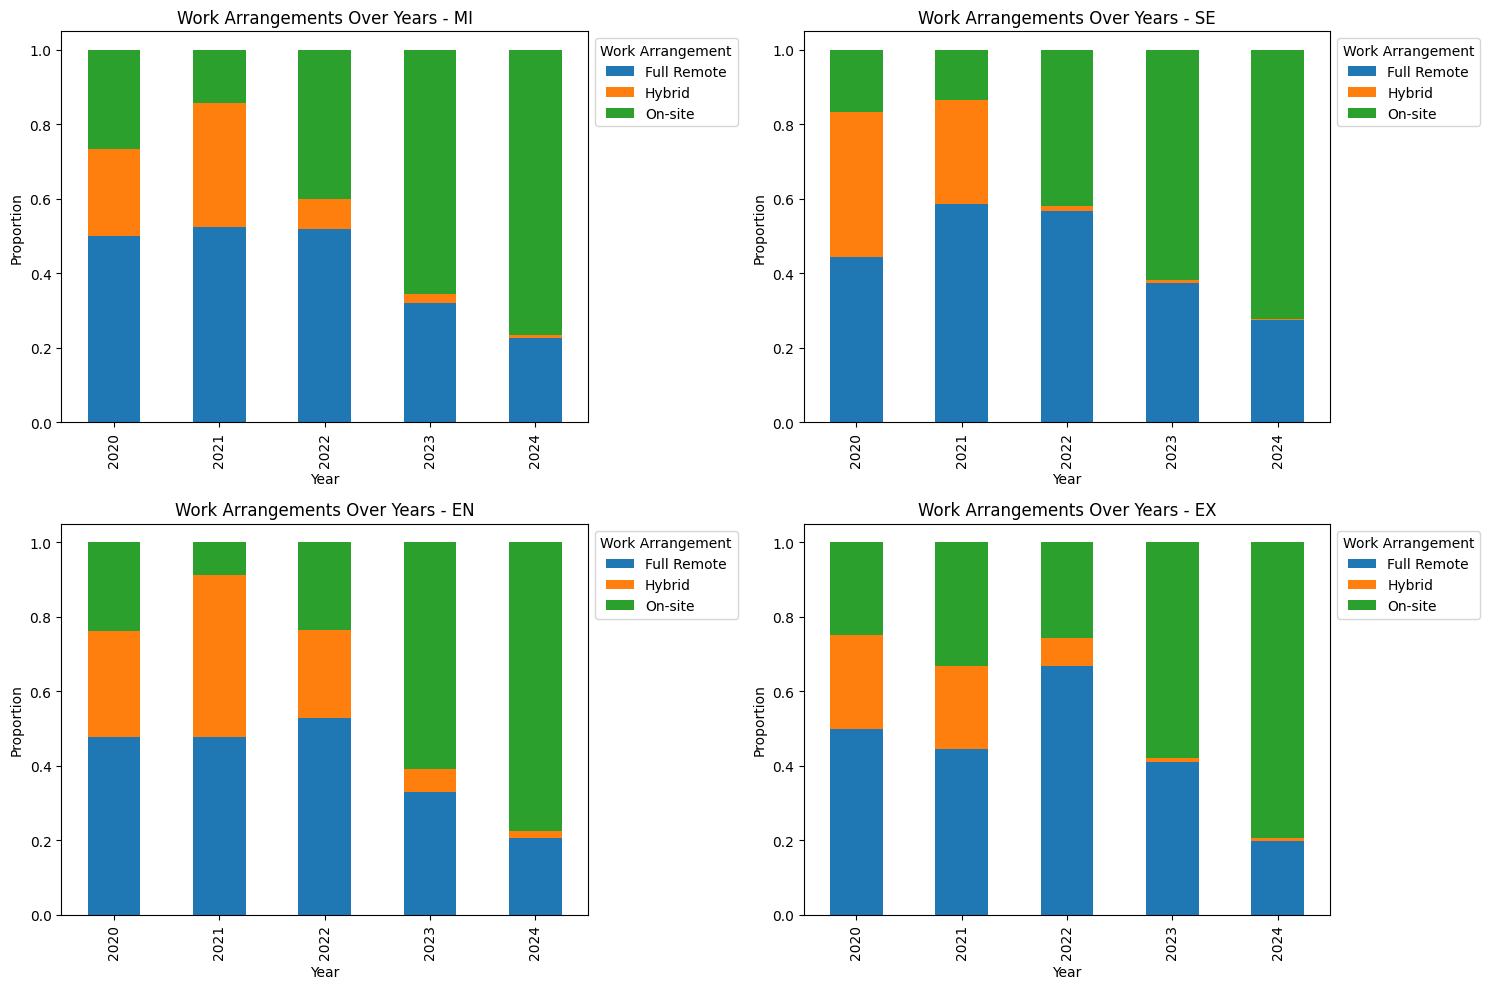

In [48]:
# 15. Yıllara ve deneyim seviyelerine göre çalışma şekillerinin değişimi
plt.figure(figsize=(15, 10))
for i, exp_level in enumerate(df['experience_level'].unique()):
    plt.subplot(2, 2, i+1)
    data = df[df['experience_level'] == exp_level]
    work_arrangement = pd.crosstab(data['work_year'], data['remote_category'], normalize='index')
    work_arrangement.plot(kind='bar', stacked=True, ax=plt.gca())
    plt.title(f'Work Arrangements Over Years - {exp_level}')
    plt.xlabel('Year')
    plt.ylabel('Proportion')
    plt.legend(title='Work Arrangement', bbox_to_anchor=(1,1))
plt.tight_layout()
plt.show()

In [49]:
# İlk 10 iş unvanını belirleme (bu veri setindeki job_title sütununa göre)
top_10_titles = df['job_title'].value_counts().head(10).index

# Veriyi filtreleme: Sadece ilk 10 iş unvanını seç
filtered_df = df[df['job_title'].isin(top_10_titles)]

# Yıllara göre ve iş unvanına göre ortalama maaşı gruplama
grouped_df = filtered_df.groupby(['work_year', 'job_title'])['salary_in_usd'].mean().reset_index()


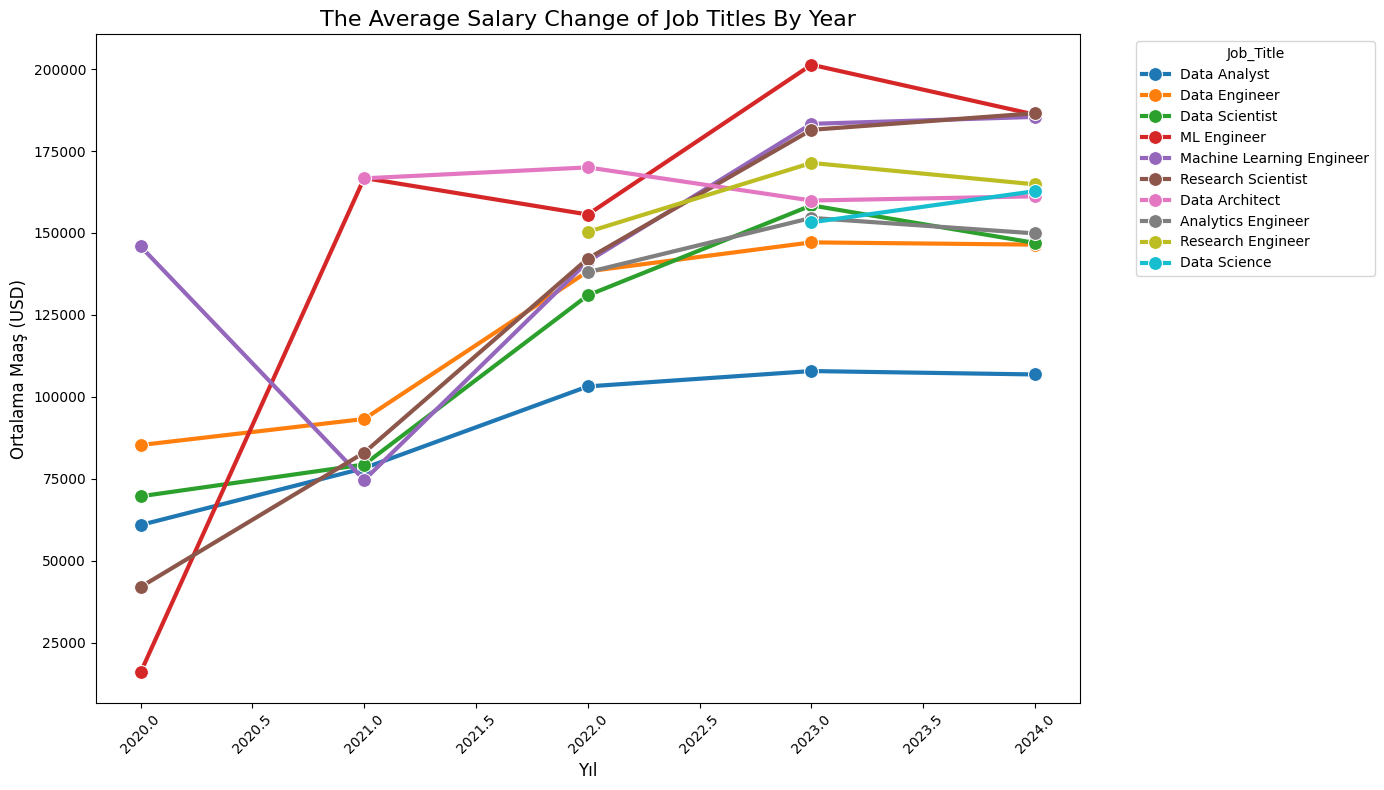

In [50]:
# 16.The Average Salary Change of Job Titles By Year
plt.figure(figsize=(14, 8))
sns.lineplot(data=grouped_df, x='work_year', y='salary_in_usd', hue='job_title', marker='o', lw=3, ms=10)
plt.title('The Average Salary Change of Job Titles By Year', fontsize=16)
plt.xlabel('Yıl', fontsize=12)
plt.ylabel('Ortalama Maaş (USD)', fontsize=12)
plt.xticks(rotation=45)
plt.legend(title='Job_Title', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [51]:
numeric_columns = df.select_dtypes(include=['int64', 'float64']).columns
numeric_columns

Index(['work_year', 'salary', 'salary_in_usd', 'remote_ratio'], dtype='object')

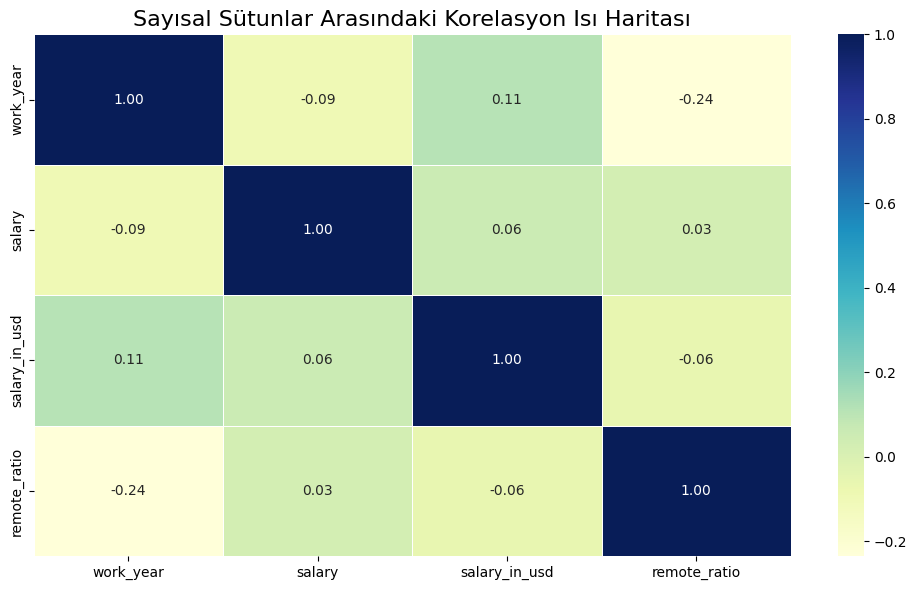

In [52]:
# Korelasyon matrisi hesaplama
correlation_matrix = df[numeric_columns].corr()

# Isı haritasını çizme
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='YlGnBu', linewidths=0.5, fmt=".2f")
plt.title('Sayısal Sütunlar Arasındaki Korelasyon Isı Haritası', fontsize=16)
plt.tight_layout()
plt.show()